In [2]:
import gensim.downloader
model = gensim.downloader.load("glove-wiki-gigaword-50")
model["tower"]

[==================================================] 100.0% 66.0/66.0MB downloaded


array([ 1.1474e+00,  1.1811e+00,  7.4556e-01, -5.9101e-02,  5.0499e-01,
       -7.0449e-01, -3.2136e-01, -4.5390e-01, -4.5763e-01, -7.5341e-01,
       -3.3511e-01, -2.4975e-02, -5.0192e-01,  6.3773e-01, -8.3059e-01,
        8.3565e-01, -2.4701e-01,  3.2421e-01, -1.1103e+00, -2.1335e-02,
        6.8717e-01, -3.9340e-01, -1.6390e+00, -5.0493e-01, -1.6684e-01,
       -6.7649e-01, -3.1798e-01,  8.8503e-01, -3.1552e-02, -1.5608e-01,
        1.9805e+00, -1.1870e+00,  8.3342e-01, -1.8369e-01, -2.6691e-01,
        1.1619e-01,  1.1023e+00, -3.5937e-01,  2.5015e-02, -4.0615e-02,
        3.0681e-01, -4.1076e-01,  8.4586e-02,  2.2475e-01, -5.0955e-01,
        6.5819e-01, -1.2432e-01, -1.4039e+00,  1.6178e-04, -5.2529e-01],
      dtype=float32)

In [7]:
model

In [35]:
import gensim.downloader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the GloVe model
model = gensim.downloader.load("glove-wiki-gigaword-50")

# Get a sample of words from the model's vocabulary to fit the PCA
sample_words = list(model.index_to_key[:10000000])  # taking a sample of 1000 words for PCA fitting
vectors = np.array([model[word] for word in sample_words])

# Initialize PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
pca.fit(vectors)



PCA(n_components=3)

In [16]:
vector

array([ 1.1474e+00,  1.1811e+00,  7.4556e-01, -5.9101e-02,  5.0499e-01,
       -7.0449e-01, -3.2136e-01, -4.5390e-01, -4.5763e-01, -7.5341e-01,
       -3.3511e-01, -2.4975e-02, -5.0192e-01,  6.3773e-01, -8.3059e-01,
        8.3565e-01, -2.4701e-01,  3.2421e-01, -1.1103e+00, -2.1335e-02,
        6.8717e-01, -3.9340e-01, -1.6390e+00, -5.0493e-01, -1.6684e-01,
       -6.7649e-01, -3.1798e-01,  8.8503e-01, -3.1552e-02, -1.5608e-01,
        1.9805e+00, -1.1870e+00,  8.3342e-01, -1.8369e-01, -2.6691e-01,
        1.1619e-01,  1.1023e+00, -3.5937e-01,  2.5015e-02, -4.0615e-02,
        3.0681e-01, -4.1076e-01,  8.4586e-02,  2.2475e-01, -5.0955e-01,
        6.5819e-01, -1.2432e-01, -1.4039e+00,  1.6178e-04, -5.2529e-01],
      dtype=float32)

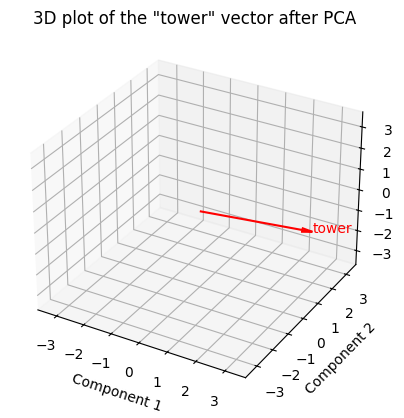

In [49]:
from mpl_toolkits.mplot3d import Axes3D

# Get the word vector for the word "tower" and transform it using PCA
vector = model["tower"]

reduced_vector = pca.transform(vector.reshape(1, -1))[0]

# Plot the reduced vector in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the vector from origin to the reduced point using quiver
ax.quiver(0, 0, 0, reduced_vector[0], reduced_vector[1], reduced_vector[2], 
          color='r', arrow_length_ratio=0.1)
ax.text(reduced_vector[0], reduced_vector[1], reduced_vector[2], 'tower', color='red')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D plot of the "tower" vector after PCA')
max_val = np.max(np.abs(reduced_vector)) * 1.1  # Adding a little margin
ax.set_xlim([-max_val, max_val])
ax.set_ylim([-max_val, max_val])
ax.set_zlim([-max_val, max_val])
plt.show()


In [43]:
reduced_vector

array([ 3.3647473 ,  1.1273686 , -0.43745327], dtype=float32)